In [2]:
import numpy as np
import pandas as pd
from itertools import combinations
import joblib
from natsort import natsort_keygen, ns
from IPython.display import display, Latex
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [9]:
def plot_individual_effects(df, ax):
    sns.set(style="white", font_scale=1)
    plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
    
    ax = sns.lineplot(data=df,
                     x='budget',
                     y='individual importance',
                     hue='parameter',
                     style='parameter',
                     markers=True, dashes=True, ax=ax, legend=True)
    
    ax.set_xlabel('Budget')
    ax.set_ylabel('Explained Variance (%)')
    ax.grid(False, which='both', axis='y')
    
    for spine in ax.spines.values():
        spine.set_color('black')
        spine.set_linewidth(0.5)
    
#     plt.show()
#     plt.savefig(f"Results/{target}/individual_effects_plot_{algorithm_name}_{target}.png", dpi=300)

    return ax

In [10]:
algorithm_names = ["modCMA-ES", "modDE"]
dimensions = [5, 30]
target = "log1"

### Individual

algorithm_name: modCMA-ES
dim: 5
budget: 500
budget: 2500
budget: 7500
dim: 30
budget: 3000
budget: 15000
budget: 45000


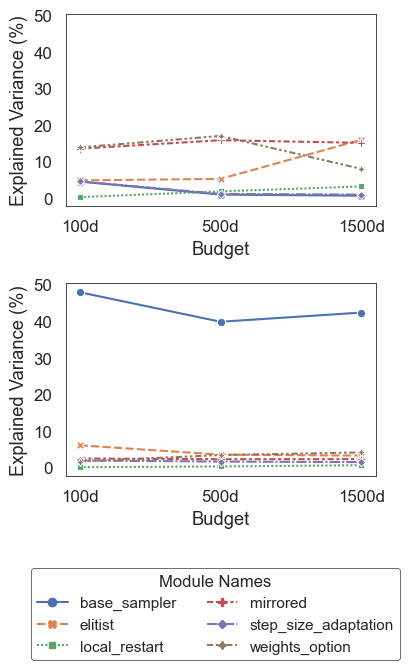

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

algorithm_name: modDE
dim: 5
budget: 500
budget: 2500
budget: 7500
dim: 30
budget: 3000
budget: 15000
budget: 45000


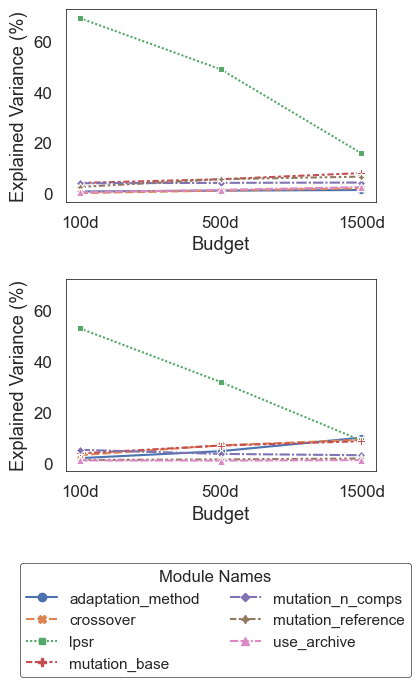

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

In [4]:
for algorithm_name in algorithm_names:
    print(f"algorithm_name: {algorithm_name}")
    df_plot_list = []
    for dim in [5, 30]:
        print(f"dim: {dim}")
        result = pd.DataFrame()
        for budget in [100*dim, 500*dim, 1500*dim]:
            print(f"budget: {budget}")
            data = pd.read_csv(f"Results/hyperparameter_importance_{algorithm_name}_{dim}_{budget}_{target}.csv")
            data = data.assign(budget=budget)
            data = data.fillna("")
            data['parameter'] = data['level_0'].astype(str) + ", " + data['level_1'].astype(str) + ", " + data['level_2'].astype(str)
            data = data.drop(['level_0', 'level_1', 'level_2'], axis=1)
            data['parameter'] = data['parameter'].str.strip(", ")
            result = pd.concat([result, data], axis=0)
        result["budget"] = result["budget"].map({100*dim: "100d", 500*dim: "500d", 1500*dim: "1500d"})
        df_plot = result[result["label"]=="main"]
        df_plot["individual importance"] = (df_plot["individual importance"]*100).round(2)
        df_plot = df_plot.sort_values(by=["budget", "parameter"], key=natsort_keygen(), ascending=[True, True])
        df_plot_list.append(df_plot)
        
    # Create a 1x2 subplot
    sns.set(style="white", font_scale=1.1)
    fig, axs = plt.subplots(2, 1, figsize=(4, 6), sharey=True)
    plt.subplots_adjust(hspace=0.4)  # Adjust horizontal space

    # Plot the first subplot
    plot_individual_effects(df_plot_list[0], axs[0])
#     axs[0].set_title(f"d={dimensions[0]}")

    # Plot the second subplot
    plot_individual_effects(df_plot_list[1], axs[1])
#     axs[1].set_title(f"d={dimensions[1]}")

    legend_labels = [text.get_text() for text in axs[0].get_legend().texts]
    legend_handles = axs[0].get_legend().get_lines()

    # Remove the legend from both subplots
    for ax in axs:
        ax.get_legend().remove()
#     fig.text(-0.06, 0.5, 'Explained Variance (%)', va='center', rotation='vertical')
#     fig.text(0.5, -0.01, 'Budget', ha='center')
    # Add the custom legend to the figure
    legend = fig.legend(legend_handles, legend_labels, loc='upper center', bbox_to_anchor=(0.5, -0.03), ncol=2, title='Module Names')
    for frame in [legend.get_frame()]:
        frame.set_edgecolor('black')
        frame.set_linewidth(0.5)

    plt.tight_layout()
#     plt.savefig(f"Results/{target}/individual_effects_plot_{algorithm_name}_{target}.png", dpi=300)
    plt.show()

### Pairwise

modCMA-ES
5

           level_0         level_1         level_2  individual importance  \
0  weights_option                                                  17.00   
1        mirrored                                                  15.83   
2        mirrored  weights_option                                  15.28   
3         elitist        mirrored                                   9.24   
4         elitist        mirrored  weights_option                   8.19   

   total importance  individual std  total std     label  budget  \
0             17.00        0.091364   0.091364      main    2500   
1             15.83        0.128847   0.128847      main    2500   
2             48.10        0.110772   0.187747  pairwise    2500   
3             30.31        0.078165   0.155280  pairwise    2500   
4             77.54        0.066451   0.150583    triple    2500   

                           parameter  
0                     weights_option  
1                           mirrored  
2  

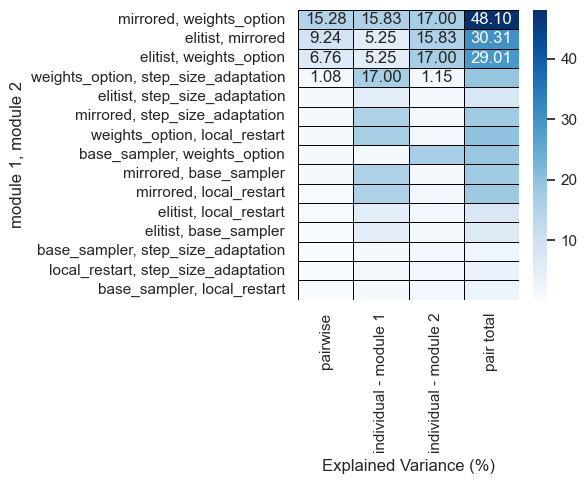

30

         level_0               level_1 level_2  individual importance  \
0  base_sampler                                                39.87   
1       elitist          base_sampler                          10.78   
2      mirrored          base_sampler                           5.48   
3  base_sampler  step_size_adaptation                           3.60   
4       elitist                                                 3.55   

   total importance  individual std  total std     label  budget  \
0             39.87        0.120319   0.120319      main   15000   
1             54.20        0.070586   0.129409  pairwise   15000   
2             47.66        0.069583   0.143869  pairwise   15000   
3             45.14        0.035901   0.127930  pairwise   15000   
4              3.55        0.033507   0.033507      main   15000   

                            parameter  
0                        base_sampler  
1               elitist, base_sampler  
2              mirrored, base_sam

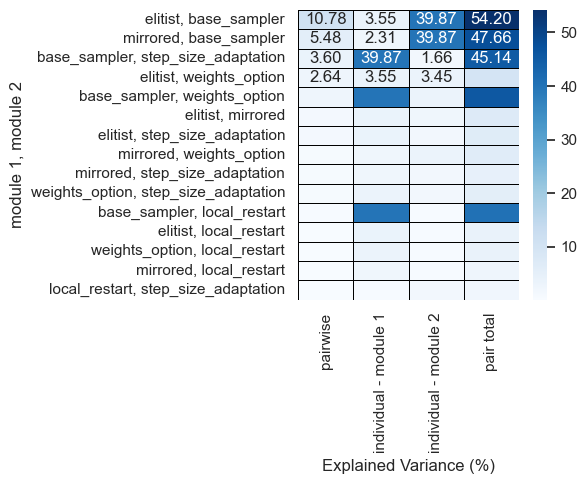

modDE
5

               level_0 level_1 level_2  individual importance  \
0                lpsr                                  48.94   
1  mutation_reference                                   5.56   
2       mutation_base                                   5.55   
3    mutation_n_comps                                   4.12   
4    mutation_n_comps    lpsr                           3.33   

   total importance  individual std  total std     label  budget  \
0             48.94        0.229681   0.229681      main    2500   
1              5.56        0.087906   0.087906      main    2500   
2              5.55        0.072495   0.072495      main    2500   
3              4.12        0.074629   0.074629      main    2500   
4             56.39        0.055283   0.226789  pairwise    2500   

                parameter  
0                    lpsr  
1      mutation_reference  
2           mutation_base  
3        mutation_n_comps  
4  mutation_n_comps, lpsr  
main:


               level

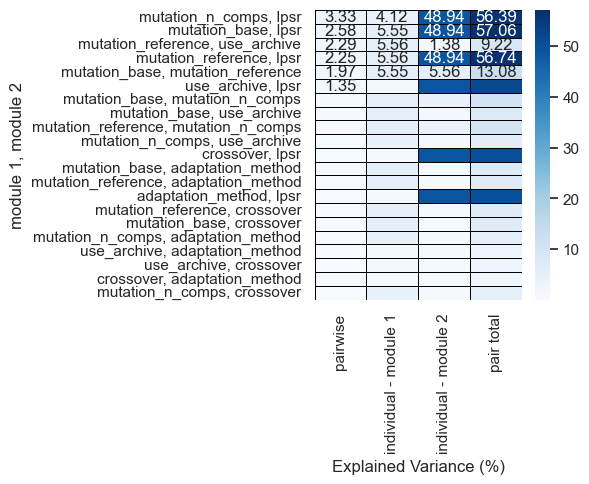

30

              level_0 level_1 level_2  individual importance  total importance  \
0               lpsr                                  31.90             31.90   
1          crossover                                   6.88              6.88   
2      mutation_base                                   6.80              6.80   
3          crossover    lpsr                           4.65             43.42   
4  adaptation_method                                   4.58              4.58   

   individual std  total std     label  budget          parameter  
0        0.187880   0.187880      main   15000               lpsr  
1        0.103175   0.103175      main   15000          crossover  
2        0.083298   0.083298      main   15000      mutation_base  
3        0.042804   0.195643  pairwise   15000    crossover, lpsr  
4        0.052716   0.052716      main   15000  adaptation_method  
main:


              level_0  individual importance
0               lpsr                  31.90
1  

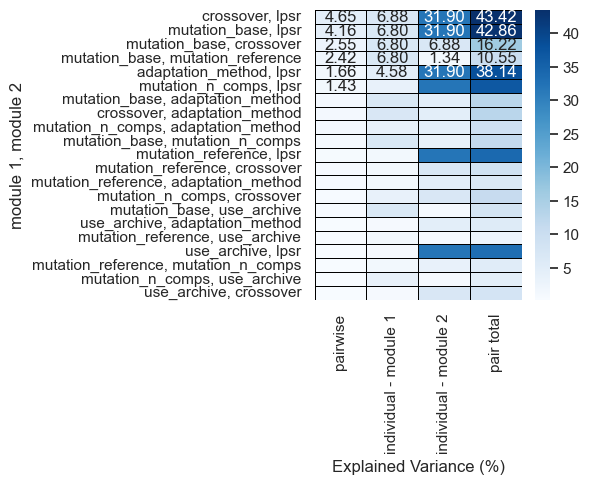

In [17]:
for algorithm_name in ["modCMA-ES", "modDE"]:
    print(algorithm_name)
    for dim in [5, 30]: 
        print(dim)
        for budget in [500*dim]: 
            data = pd.read_csv(f"Results/hyperparameter_importance_{algorithm_name}_{dim}_{budget}_{target}.csv")
            data = data.assign(budget=budget)
            data = data.fillna("")
            data['parameter'] = data['level_0'].astype(str) + ", " + data['level_1'].astype(str) + ", " + data['level_2'].astype(str)
            data['parameter'] = data['parameter'].str.strip(", ")
            data['individual importance'] = (data['individual importance']*100).round(2)
            data['total importance'] = (data['total importance']*100).round(2)
            print(f"\n {data.head()}")
            
            main = data[data["label"]=="main"][["level_0", "individual importance"]]
            print("main:\n")
            print(f"\n {main.head()}")
          
            pairwise = data[data["label"]=="pairwise"][["level_0", "level_1", "individual importance", "total importance"]]
            print(f"\n {pairwise.head()}")
            
            df = pd.merge(pairwise, main, on="level_0", how="left")
      
            df = pd.merge(df, main.rename(columns={"level_0": "level_1"}), on="level_1"
                          , how="left").rename(columns={"individual importance_x": f"pairwise", "individual importance_y": "individual - module 1", "individual importance": "individual - module 2", "total importance": "pair total"})
        
            df = df[['level_0', 'level_1', 'pairwise',
                   "individual - module 1",
                   "individual - module 2", 'pair total']]
#             print(f"\n {df.head()}")
            print(f"\n Final data: ")
            print(df)
            print(df.shape)
            
            plt.figure(figsize=(6, 5))
            ax = sns.heatmap(df.set_index(['level_0', 'level_1']).sort_values(by="pairwise", ascending=False), annot=True, cmap='Blues', fmt=".2f", linewidth=0.5, linecolor="black")
            # plt.title('Heatmap of Parameters and Their Importances')

            # Get the current y-tick labels
            current_labels = [item.get_text() for item in ax.get_yticklabels()]
            # Replace '-' with ',' in the y-tick labels
            new_labels = [label.replace('-', ', ') for label in current_labels]
            # Set the new y-tick labels
            ax.set_yticklabels(new_labels, rotation=0)  # Set the rotation to 0 for horizontal labels
            ax.set_xticklabels(ax.get_xticklabels(), rotation=90)  # Set the rotation to 0 for horizontal labels
            ax.set_xlabel("Explained Variance (%)")
            ax.set_ylabel("module 1, module 2",  rotation=90)

            plt.tight_layout()
#             plt.savefig(f"Results/heatmap_plot_pairwise_{algorithm_name}_{dim}_{target}.png", dpi=300)
            plt.show()

### Triplet

In [24]:
results = pd.DataFrame()
for algorithm_name in ["modCMA-ES", "modDE"]:
    print(algorithm_name)
    for dim in [5, 30]: 
        print(dim)
        for budget in [500*dim]: 
            data = pd.read_csv(f"Results/hyperparameter_importance_{algorithm_name}_{dim}_{budget}_{target}.csv")
            main = data[data["label"]=="main"][["level_0", "individual importance"]]
            print(f"\n {main.head(7)}")
            
            triple = data[data["label"]=="triple"][["level_0", "level_1", "level_2", "individual importance", "total importance"]].rename(columns={"individual importance": "triple", "total importance": "triple total"})
            print(f"\n {triple.head(7)}")
           
            df = pd.merge(triple, main, on="level_0").rename(columns={"individual importance": "main - module 1"})
            df = pd.merge(df, main.rename(columns={"level_0": "level_1"}), on="level_1"
                          , how="left").rename(columns={"individual importance": "main - module 2"})
            df = pd.merge(df, main.rename(columns={"level_0": "level_2"}), on="level_2"
                          , how="left").rename(columns={"individual importance": "main - module 3"})
            df = df.fillna("")
            df['parameter'] = df['level_0'].astype(str) + ", " + df['level_1'].astype(str) + ", " + df['level_2'].astype(str)
            df['parameter'] = df['parameter'].str.strip(", ")
            df = df.drop(['level_0', 'level_1', 'level_2'], axis=1)
            df['triple'] = (df['triple']*100).round(2)
            df['triple total'] = (df['triple total']*100).round(2)
            df["main - module 1"] = (df["main - module 1"]*100).round(2)
            df["main - module 2"] = (df["main - module 2"]*100).round(2)
            df["main - module 3"] = (df["main - module 3"]*100).round(2)
            df = df.assign(budget=budget, algorithm_name=algorithm_name, dim=dim)
            df = df.sort_values(by=["triple"], ascending=[False]).head(5)
            print(f"\n {df.head()}")
            results = pd.concat([results, df], axis=0)
results = results.set_index(["algorithm_name", "dim", "parameter"])
print(results)

display(Latex(results[["triple", "triple total"]].to_latex()))

modCMA-ES
5

                  level_0  individual importance
0         weights_option               0.169980
1               mirrored               0.158266
6                elitist               0.052499
7          local_restart               0.018484
10  step_size_adaptation               0.011477
13          base_sampler               0.009743

      level_0         level_1               level_2    triple  triple total
4    elitist        mirrored        weights_option  0.081929      0.775442
8   mirrored  weights_option  step_size_adaptation  0.011926      0.524277
9   mirrored    base_sampler        weights_option  0.011592      0.519252
14  mirrored  weights_option         local_restart  0.009464      0.523534
19   elitist  weights_option  step_size_adaptation  0.006555      0.329233
20   elitist        mirrored  step_size_adaptation  0.006439      0.340375
23   elitist  weights_option         local_restart  0.004111      0.325965

     triple  triple total  main - module 1  mai

<IPython.core.display.Latex object>

### Summary visualization


In [25]:
summary = pd.DataFrame()
for algorithm_name in ["modCMA-ES", "modDE"]:
    for dim in [5, 30]: 
        for budget in [100*dim, 500*dim, 1500*dim]: 
            data = pd.read_csv(f"Results/hyperparameter_importance_{algorithm_name}_{dim}_{budget}_{target}.csv")
            data = data.assign(algorithm_name=algorithm_name)
            data = data.assign(dim=dim)
            data = data.assign(budget=budget)
            data = data.fillna("")
            data['parameter'] = data['level_0'].astype(str) + ", " + data['level_1'].astype(str) + ", " + data['level_2'].astype(str)
            data['parameter'] = data['parameter'].str.strip(", ")
            data['individual importance'] = (data['individual importance']*100).round(2)
            summary = pd.concat([summary, data], axis=0)
summary.head(10)

,level_0,level_1,level_2,individual importance,total importance,individual std,total std,label,algorithm_name,dim,budget,parameter
0,weights_option,,,13.87,0.138708,0.082400,0.082400,main,modCMA-ES,5,500,weights_option
1,mirrored,,,13.51,0.135058,0.109348,0.109348,main,modCMA-ES,5,500,mirrored
2,elitist,mirrored,,10.59,0.289623,0.070139,0.154421,pairwise,modCMA-ES,5,500,"elitist, mirrored"
3,mirrored,weights_option,,7.68,0.350546,0.068290,0.175313,pairwise,modCMA-ES,5,500,"mirrored, weights_option"
4,elitist,weights_option,,7.06,0.257961,0.051815,0.105610,pairwise,modCMA-ES,5,500,"elitist, weights_option"
5,elitist,mirrored,weights_option,5.70,0.632716,0.037314,0.184143,triple,modCMA-ES,5,500,"elitist, mirrored, weights_option"
6,elitist,,,4.87,0.048671,0.045664,0.045664,main,modCMA-ES,5,500,elitist
7,step_size_adaptation,,,4.59,0.045934,0.059384,0.059384,main,modCMA-ES,5,500,step_size_adaptation
8,base_sampler,,,4.52,0.045246,0.057737,0.057737,main,modCMA-ES,5,500,base_sampler
9,mirrored,base_sampler,,2.27,0.202965,0.026715,0.108918,pairwise,modCMA-ES,5,500,"mirrored, base_sampler"


In [26]:
summary = summary.groupby(["algorithm_name", "dim", "budget", "label"])["individual importance"].sum().reset_index()
summary = summary.sort_values(["dim", "algorithm_name", "budget"])
summary = summary.pivot(index=["algorithm_name", "dim", "budget"], columns="label", values="individual importance")
summary['total'] = summary[["main", "pairwise", "triple"]].sum(axis=1)

In [27]:
display(Latex(summary.to_latex()))

<IPython.core.display.Latex object>

In [29]:
display(Latex(data.nlargest(10, 'individual importance')[["parameter", "individual importance", "total importance"]].to_latex()))

<IPython.core.display.Latex object>

In [30]:
display(Latex(data.groupby('label').apply(lambda x: x.nlargest(5, 'individual importance')).reset_index(drop=True)[["parameter", "label", "individual importance", "total importance"]].to_latex()))

<IPython.core.display.Latex object>

In [31]:
# Calculating sum for each group
group_sum = data.groupby('label', as_index=False).sum()
display(Latex(group_sum[["label", "individual importance"]].to_latex()))

<IPython.core.display.Latex object>

### Problem Level

modCMA-ES
5
2500
            5         15        23
f_id                              
5     1.000000  0.487101  0.448986
15    0.487101  1.000000  0.991468
23    0.448986  0.991468  1.000000


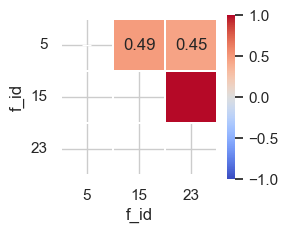

30
15000
            5         15        23
f_id                              
5     1.000000  0.517838  0.930638
15    0.517838  1.000000  0.251753
23    0.930638  0.251753  1.000000


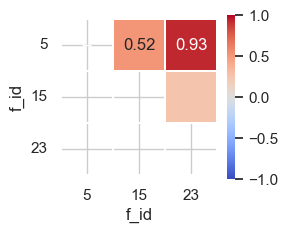

modDE
5
2500
            5         15        23
f_id                              
5     1.000000  0.283654  0.501549
15    0.283654  1.000000  0.323114
23    0.501549  0.323114  1.000000


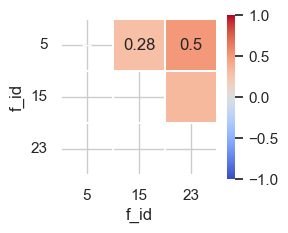

30
15000
            5         15        23
f_id                              
5     1.000000  0.399318  0.634636
15    0.399318  1.000000  0.623269
23    0.634636  0.623269  1.000000


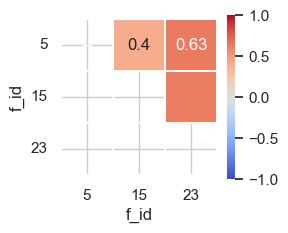

In [5]:
from sklearn.metrics.pairwise import cosine_similarity
budgets = {
                5: [2500], # 500,
                30: [15000] # 45000, # 3000, 
              }
target = "log1"

for algorithm_name in ["modCMA-ES", "modDE"]:
    print(algorithm_name)
    for dim in [5, 30]: 
        print(dim)
        for budget in budgets[dim]:
            print(budget)
            data = pd.DataFrame()
            for f_id in [5, 15, 23]:
                df = pd.read_csv(f"Results/hyperparameter_importance_{algorithm_name}_{dim}_{budget}_{target}_{f_id}.csv")
                df = df.fillna("")
                df['parameter'] = df['level_0'].astype(str) + ", " + df['level_1'].astype(str) + ", " + df['level_2'].astype(str)
                df['parameter'] = df['parameter'].str.strip(", ")
                df = df.drop(['level_0', 'level_1', 'level_2'], axis=1)
                df = df.sort_values(by="parameter")
                data = pd.concat([data, df.assign(f_id=f_id)], axis=0)
            df_pivot = data.pivot(index="f_id", columns="parameter", values="individual importance")
            df_pivot = pd.DataFrame(cosine_similarity(df_pivot), index=df_pivot.index, columns=df_pivot.index.to_list())
            print(df_pivot)
            sns.set(style="whitegrid", font_scale=1)
            plt.figure(figsize=(3, 2.5))
            # Create a mask for the upper triangle
            mask = np.tril(np.ones_like(df_pivot, dtype=bool))
            sns.heatmap(df_pivot, annot=True, cmap='coolwarm', mask=mask, square=True, linewidth=0.1, vmin=-1, vmax=1)
            plt.xlabel("f_id")
            plt.yticks(rotation=0)  # Rotate y-axis ticks to horizontal
            plt.tight_layout()
#             plt.savefig(f"Results/heatmap_cosine_{algorithm_name}_{dim}_{budget}_{target}.png", dpi=300)
            plt.show()

In [6]:
data = pd.DataFrame()
for algorithm_name in ["modCMA-ES", "modDE"]:
    print(algorithm_name)
    for dim in [5, 30]: 
        print(dim)
        for budget in [500*dim]:
            print(budget)
#             data = pd.DataFrame()
            for f_id in [5, 15, 23]:
                print(f_id)
                df = pd.read_csv(f"Results/hyperparameter_importance_{algorithm_name}_{dim}_{budget}_{target}_{f_id}.csv")
                df = df[df["label"]=="triple"]
                df['parameter'] = df['level_0'].astype(str) + ", " + df['level_1'].astype(str) + ", " + df['level_2'].astype(str)
                df['parameter'] = df['parameter'].str.strip(", ")
                df = df.drop(['level_0', 'level_1', 'level_2'], axis=1)
                df = df.sort_values(by="total importance", ascending=False)
                df['total importance'] = (df['total importance']*100).round(2)
                print(df.head(1)[["parameter", "total importance"]])
                df = df.assign(algorithm_name=algorithm_name, dim=dim, f_id=f_id)
                df = df.head(1)
                data = pd.concat([data, df], axis=0)
print(data)

modCMA-ES
5
2500
5
                                       parameter  total importance
6  elitist, weights_option, step_size_adaptation             29.52
15
                               parameter  total importance
26  elitist, base_sampler, local_restart              62.4
23
                            parameter  total importance
16  elitist, mirrored, weights_option             78.99
30
15000
5
                               parameter  total importance
7  elitist, base_sampler, weights_option             81.08
15
                         parameter  total importance
8  elitist, mirrored, base_sampler             69.93
23
                                 parameter  total importance
6  elitist, mirrored, step_size_adaptation             84.73
modDE
5
2500
5
                                      parameter  total importance
3  mutation_base, mutation_n_comps, use_archive             23.73
15
                                  parameter  total importance
12  mutation_base, mutation_referenc

In [7]:
data = data[["algorithm_name", "dim", "f_id", "parameter", "total importance"]].pivot(index=["dim", "f_id"]
                                                                                     , columns=["algorithm_name"]
                                                                                     , values=["parameter", "total importance"])

In [8]:
data.columns

MultiIndex([(       'parameter', 'modCMA-ES'),
            (       'parameter',     'modDE'),
            ('total importance', 'modCMA-ES'),
            ('total importance',     'modDE')],
           names=[None, 'algorithm_name'])

In [9]:
new_order = [
    ('parameter', 'modCMA-ES'),
    ('total importance', 'modCMA-ES'),
    ('parameter', 'modDE'),
    ('total importance', 'modDE'),  # Place 'modDE' before 'modCMA-ES'
      # 'modCMA-ES' follows 'modDE'
]

# Reindex the DataFrame with the new column order
data = data.reindex(columns=pd.MultiIndex.from_tuples(new_order))

In [10]:
display(Latex(data.to_latex()))

<IPython.core.display.Latex object>